# Model to detect incoming churn customer based on credit info

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('data/credit.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


There is:
- 165k records
- 14 non-null columns
- 3 id cols (id, CustomerId, Surname)
- 10 feature cols (2 is categorical feature)
- 1 target col (Exited)

# Define cols variables

In [6]:
col_target = 'Exited'
cols_id = ['id', 'CustomerId', 'Surname']
cols_feature = list(df.drop([col_target] + cols_id, axis = 1).columns)

In [8]:
cols_feature_cat = list(df[cols_feature].select_dtypes('object').columns)
cols_feature_num = [col for col in cols_feature if col not in cols_feature_cat]
print(f"Numeric features: {cols_feature_num} ")
print(f"Categorical features: {cols_feature_cat}")

Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] 
Categorical features: ['Geography', 'Gender']


# EDA

## Univariate 

### Categorical features

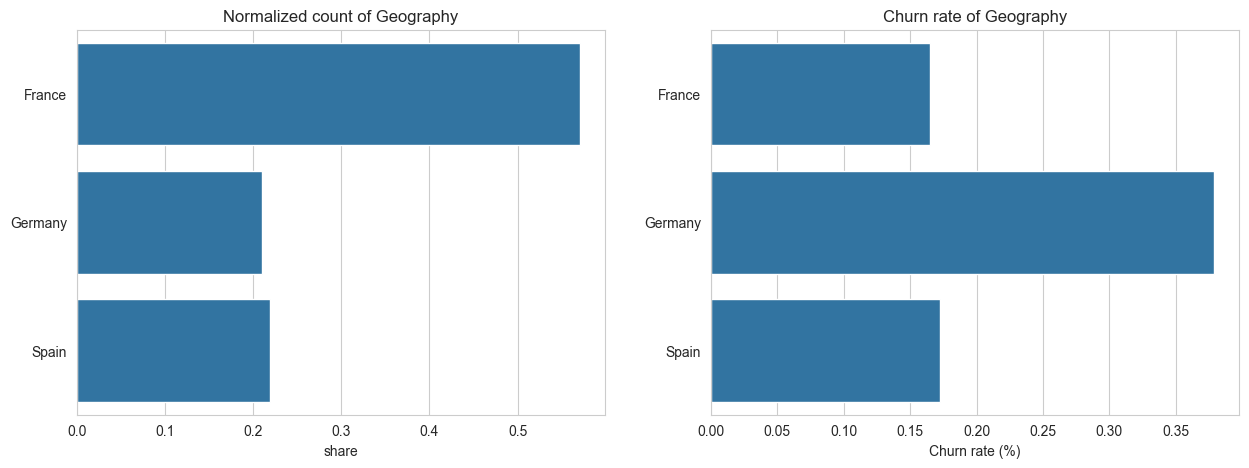

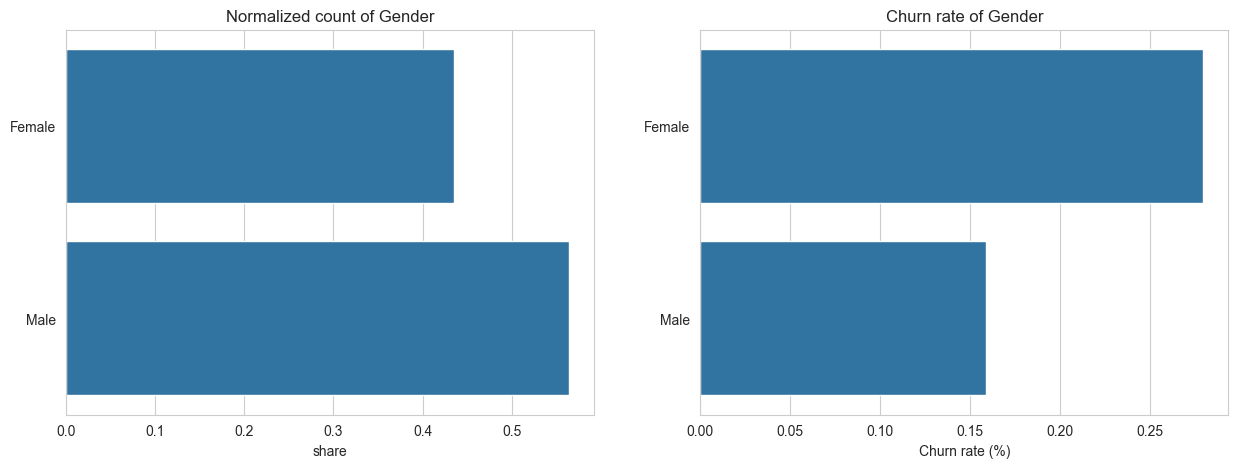

In [74]:
for col in cols_feature_cat:
    fig, (ax_count, ax_target) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    sns.barplot(
        df[col].value_counts(normalize = True).sort_index(), 
        orient = 'h',
        ax = ax_count
    ).set(
        title = f'Normalized count of {col}', 
        ylabel = '',
        xlabel = 'share'
    )
    
    sns.barplot(
        df.groupby(col)[col_target].mean().sort_index(), 
        orient = 'h',
        ax = ax_target
    ).set(
        title = f'Churn rate of {col}', 
        ylabel = '',
        xlabel = f"Churn rate (%)",
    )
    plt.show()